In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_path = 'C:/Users/HARSHAL/Resume Projects/Zomato Text Data Analysis/zomato.csv'

In [3]:
from pandas import read_csv
df= read_csv(data_path)
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [8]:
data = df.copy()
data.groupby(["name", "address"]).agg({"listed_in(type)" : list})

listed_in(type)
name                                         address                                                                                              
#FeelTheROLL                                 Opposite Mantri Commercio, Outer Ring Road, Dev...                               [Delivery, Delivery]
#L-81 Cafe                                   Sector 6, HSR Layout, HSR                           [Delivery, Dine-out, Delivery, Dine-out, Deliv...
#Vibes Restro                                Marasur Gate, Chandapura - Anekal Road, Near Al...                       [Buffet, Delivery, Dine-out]
#refuel                                      7, Ground Floor, RR Commercial Complex, Akshay ...                        [Cafes, Delivery, Dine-out]
'Brahmins' Thatte Idli                       19, 1st main, 2nd cross, 3rd stage, 3rd block, ...                                         [Dine-out]
...                                                                                                                                            ...
nu.tree                                      47/7 First floor, DoddaThogur Road, Near Velank...                                         [Delivery]
                                             Ground Floor-Lobby Area, Brigade IRV Centre, Na...                     [Delivery, Delivery, Delivery]
re:cess - Hilton Bangalore Embassy GolfLinks Hilton Bangalore Embassy GolfLinks, Embassy Gol...                [Dine-out, Dine-out, Pubs and bars]
repEAT Hub                                   67/4, Bhoganahalli Road, JCR Layout, Panathur, ...                               [Delivery, Dine-out]
sCoolMeal                                    197/293-3, 32nd Main, 1st Stage, BTM, Bangalore     [Delivery, Delivery, Delivery, Delivery, Deliv...

[12499 rows x 1 columns]

In [9]:

grouped=data.groupby(["name", "address"]).agg({"listed_in(type)" : list})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
newdata = pd.merge(grouped, data, on = (["name", "address"]))
newdata.columns

Index(['name', 'address', 'listed_in(type)_x', 'url', 'online_order',
       'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)_y', 'listed_in(city)'],
      dtype='object')

In [11]:
newdata['listed_in(type)_y'].dtype
newdata.shape

(51717, 18)

In [12]:
newdata.drop_duplicates(subset = ["name", "address", "listed_in(type)_y"], inplace = True)
newdata.shape

(20915, 18)

In [13]:
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
3,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
11,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
12,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [14]:
newdata = newdata.reset_index(drop = True)
newdata.head()

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city)
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...","[Delivery, Delivery]",https://www.zomato.com/bangalore/feeltheroll-b...,No,No,3.4/5,7,+91 9108342079\r\n+91 9886117901,Bellandur,Quick Bites,NaN,Fast Food,200,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM
2,#L-81 Cafe,"Sector 6, HSR Layout, HSR","[Delivery, Dine-out, Delivery, Dine-out, Deliv...",https://www.zomato.com/bangalore/l-81-cafe-hsr...,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,BTM
3,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City
4,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...","[Buffet, Delivery, Dine-out]",https://www.zomato.com/bangalore/vibes-restro-...,No,No,NaN,0,+91 9538911285,Electronic City,Casual Dining,NaN,"Continental, Chinese, Italian",700,"[('Rated 5.0', ""RATED\n Great service and don...",[],Delivery,Electronic City


In [15]:
newdata["rating"] = newdata["rate"].str[:3]
newdata["rating"].replace('NEW',0,inplace=True)
newdata["rating"].replace('-',0,inplace=True)
newdata["rating"] = pd.to_numeric(newdata["rating"])

In [16]:
newdata["rating"].head()

0    3.4
1    3.9
2    3.9
3    NaN
4    NaN
Name: rating, dtype: float64

In [17]:
newdata['rating'].unique()

array([3.4, 3.9, nan, 3.7, 3.2, 3.5, 4.6, 4.1, 4.2, 4.3, 4. , 3.1, 3.6,
       3.3, 3. , 4.4, 4.5, 0. , 3.8, 2.7, 2.8, 2.9, 2.5, 4.9, 4.7, 4.8,
       1.8, 2.4, 2.1, 2.2, 2.6, 2.3, 2. ])

In [18]:
newdata["rating"]=pd.cut(newdata["rating"], bins = [1, 3.25, 4.1, 5.0], labels = ["0", "1", "2"])

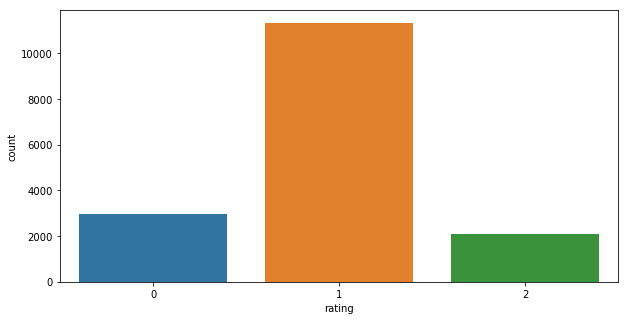

In [19]:
plt.figure(figsize = (10, 5))
sns.countplot(newdata["rating"])

In [20]:
newdata.describe(include = "all")

,name,address,listed_in(type)_x,url,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)_y,listed_in(city),rating
count,20915,20915,20915,20915,20915,20915,17532,20915.000000,20516,20903,20809,8916,20892,20817,20915,20915,20915,20915,16391
unique,8792,11495,927,20915,2,2,61,NaN,11999,93,93,4502,2630,70,12660,3693,7,30,3
top,Cafe Coffee Day,Delivery Only,"[Delivery, Dine-out]",https://www.zomato.com/bangalore/bhajankas-res...,Yes,No,3.9/5,NaN,080 43334333,Whitefield,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM,1
freq,78,36,2418,1,11605,18615,1181,NaN,93,1462,8007,78,1174,3005,3524,16766,9355,2379,11321
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.105427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.954538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
newdata.shape

(20915, 19)

In [23]:
import re
sample=newdata.sample(n=2000)
total_review=' '
for review in sample['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)

(-0.5, 799.5, 799.5, -0.5)

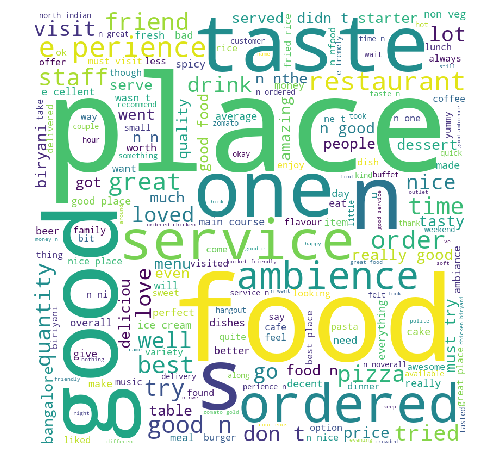

In [24]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review)                       
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [25]:
from nltk.corpus import RegexpTokenizer as regextoken
newdata["reviews_list"] = newdata["reviews_list"].apply(lambda x: x.lower())
tokenizer = regextoken("[a-zA-Z]+") 
newdata["reviews_list"][0]
print(tokenizer.tokenize(newdata["reviews_list"][0]))

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [26]:
review_tokens = newdata["reviews_list"].apply(tokenizer.tokenize)
print(review_tokens[0])

['rated', 'rated', 'n', 'had', 'an', 'egg', 'chicken', 'roll', 'and', 'a', 'paneer', 'roll', 'really', 'yummy', 'a', 'must', 'visit', 'place', 'it', 'would', 'be', 'good', 'if', 'you', 'guys', 'can', 'keep', 'the', 'shop', 'open', 'on', 'sunday', 's', 'as', 'well', 'good', 'luck', 'rated', 'rated', 'n', 'not', 'just', 'the', 'roll', 'but', 'the', 'filling', 'tastes', 'great', 'i', 'would', 'highly', 'recommend', 'to', 'others', 'to', 'try', 'their', 'rolls', 'owners', 'hospitality', 'is', 'also', 'good', 'and', 'very', 'friendly', 'rated', 'rated', 'n', 'very', 'nice', 'place', 'complete', 'value', 'for', 'money', 'highly', 'recommend', 'must', 'visit', 'for', 'any', 'foodie', 'i', 'would', 'recommend', 'the', 'egg', 'chicken', 'roll', 'feeltheroll', 'rated', 'rated', 'n', 'had', 'an', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'a', 'must', 'try', 'for', 'every', 'foodie', 'a', 'variety', 'of', 'rolls', 'and', 'sandwiches', 'are', 'available', 'as', 'w

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
stop.extend(["rated", "n", "nan", "x"])
rev=review_tokens[0]
print([token for token in rev if token not in stop])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [29]:
def remove_stopwords(text):
    updated_text=[token for token in text if token not in stop]
    return updated_text
review_tokens=review_tokens.apply(remove_stopwords)
type(review_tokens)
print(review_tokens[0])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia']


In [30]:
all_reviews = review_tokens.astype(str).str.cat()
all_reviews[0:200]
cleaned_reviews = tokenizer.tokenize(all_reviews)
len(cleaned_reviews)

13376224

In [31]:
print(cleaned_reviews[0:200])

['egg', 'chicken', 'roll', 'paneer', 'roll', 'really', 'yummy', 'must', 'visit', 'place', 'would', 'good', 'guys', 'keep', 'shop', 'open', 'sunday', 'well', 'good', 'luck', 'roll', 'filling', 'tastes', 'great', 'would', 'highly', 'recommend', 'others', 'try', 'rolls', 'owners', 'hospitality', 'also', 'good', 'friendly', 'nice', 'place', 'complete', 'value', 'money', 'highly', 'recommend', 'must', 'visit', 'foodie', 'would', 'recommend', 'egg', 'chicken', 'roll', 'feeltheroll', 'amazing', 'mouth', 'watering', 'chicken', 'roll', 'worth', 'every', 'bite', 'must', 'try', 'every', 'foodie', 'variety', 'rolls', 'sandwiches', 'available', 'well', 'budding', 'rafflesia', 'little', 'cafe', 'set', 'beautiful', 'location', 'ambiance', 'good', 'nthe', 'burger', 'filled', 'taste', 'chicken', 'nthe', 'banana', 'chocolate', 'sandwich', 'variety', 'would', 'never', 'find', 'restaurants', 'bangalore', 'drinks', 'wonderful', 'lot', 'flavours', 'choose', 'nit', 'took', 'little', 'time', 'expected', 'food

In [32]:
from nltk import FreqDist, bigrams, trigrams
fd = FreqDist()
for word in cleaned_reviews:
    fd[word]=fd[word]+ 1
fd.most_common(5)    

[('good', 328304),
 ('place', 317915),
 ('food', 307405),
 ('chicken', 141301),
 ('service', 109512)]

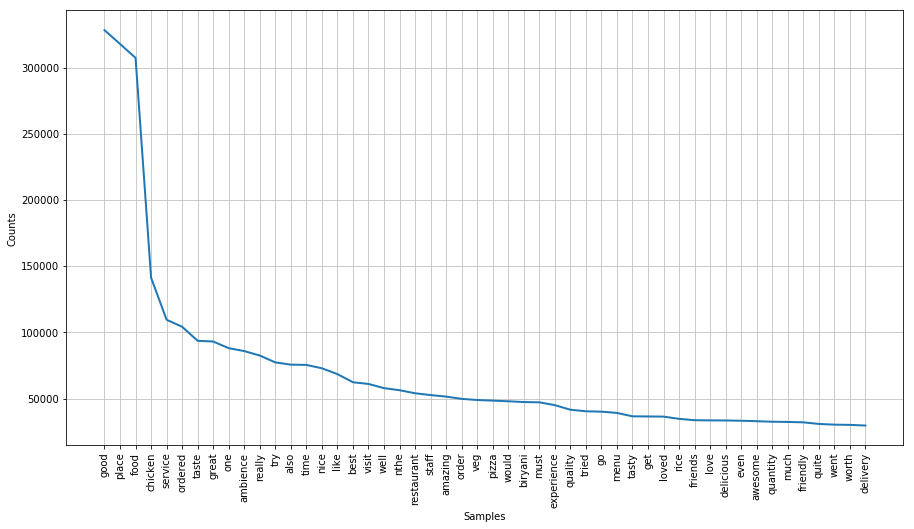

In [33]:
plt.figure(figsize = (15, 8))
fd.plot(50)

In [34]:
from nltk import bigrams
bigrams = bigrams(cleaned_reviews)
bigrams

<generator object bigrams at 0x000001AF9F67DBA0>